In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter

In [2]:
# Parámetros
h1 = 164 
L = 119000 
Z_max = -1493 - 164 # Profundidad en Y = -62000
Y_fondo= -62000
L_expansion = 2 * L
DelX = 20
DelY = 20#m
# Calcular nx y ny como enteros
nx = int(4 * L / DelX)
ny = int((119000 + 240000) / DelY)
print(ny)
print(nx)

17950
23800


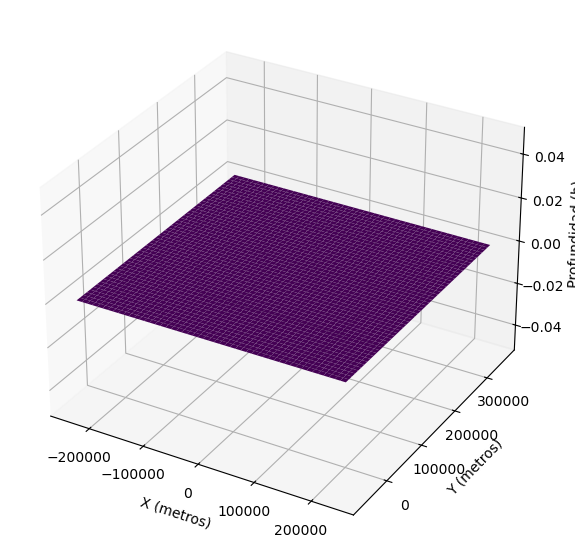

In [3]:
# Crear el dominio expandido con ceros en la profundidad
x_domain = np.linspace(-L_expansion, L_expansion, nx)  # Dominio en X
y_domain = np.linspace(Y_fondo, 3*L, ny)  # Dominio en Y
X_domain, Y_domain = np.meshgrid(x_domain, y_domain)
Z_domain = np.zeros_like(X_domain)  # Inicializamos Z con ceros

# Graficar el sólido de revolución
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


# Usar plot_surface para graficar la superficie
ax.plot_surface(X_domain, Y_domain, Z_domain, cmap='viridis')
#ax.plot(X[] color='red', linewidth=2)

# Etiquetas de los ejes
ax.set_xlabel('X (metros)')
ax.set_ylabel('Y (metros)')
ax.set_zlabel('Profundidad (h)')

plt.show()

In [4]:
print(Z_domain.shape)

(17950, 23800)


(5950, 11900)


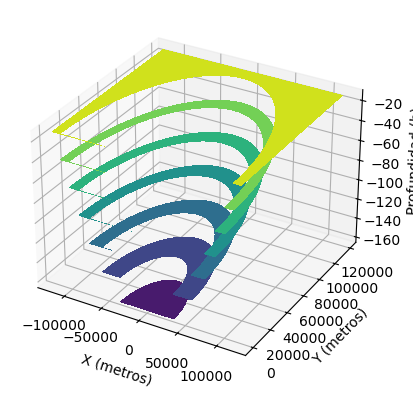

In [5]:
# Parámetros para la bahía

r = np.linspace(0, L, 400)  # Intervalo de r
theta = np.linspace(0, np.pi, 400)  # Intervalo angular para la revolución

# Definición de la función h(r) para la bahía
h_r = h1 * (1 - (r**2) / (L**2))

# Crear la malla de puntos para la bahía (en coordenadas polares)
R, Theta = np.meshgrid(r, theta)

# Convertir las coordenadas polares a cartesianas
X_bahia = R * np.cos(Theta)
Y_bahia = R * np.sin(Theta)

# Generar Z_bahia de acuerdo a la función h(r) en el dominio cartesiano
Z_bahia_polar = h1 * (1 - (R**2) / (L**2))

# Interpolamos los datos en el dominio cartesiano
# Crear una malla para interpolación más refinada
x_new = np.linspace(np.min(X_bahia), np.max(X_bahia), int(2*L/DelX)) #quiero que mida 2L
y_new = np.linspace(np.min(Y_bahia), np.max(Y_bahia),int(L/DelY))
X_new, Y_new = np.meshgrid(x_new, y_new)

# Puntos originales en coordenadas cartesianas
points = np.array([X_bahia.flatten(), Y_bahia.flatten()]).T
values = Z_bahia_polar.flatten()

# Interpolación en la nueva malla cartesiana
Z_bahia = -griddata(points, values, (X_new, Y_new), method='linear')
# Aplicar máscara para convertir NaN en 0
Z_bahia = np.nan_to_num(Z_bahia, nan=0)
print(Z_bahia.shape)

# Graficar la bahía interpolada en coordenadas cartesianas
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Usar plot_surface para graficar la superficie
#ax.plot_surface(X_new[:,0:200], Y_new[:,0:200], Z_new[:,0:200], cmap='viridis')
#ax.plot_surface(X_new, Y_new, Z_new, cmap='viridis')
ax.contourf(X_new, Y_new,Z_bahia, cmap='viridis')
# Etiquetas de los ejes
ax.set_xlabel('X (metros)')
ax.set_ylabel('Y (metros)')
ax.set_zlabel('Profundidad (h)')

plt.show()

In [6]:
print(Z_domain.shape)

(17950, 23800)


In [7]:
Y_domain[3100,0]

10366.148531951636

In [8]:
3100- len(Z_domain[:,0])

-14850

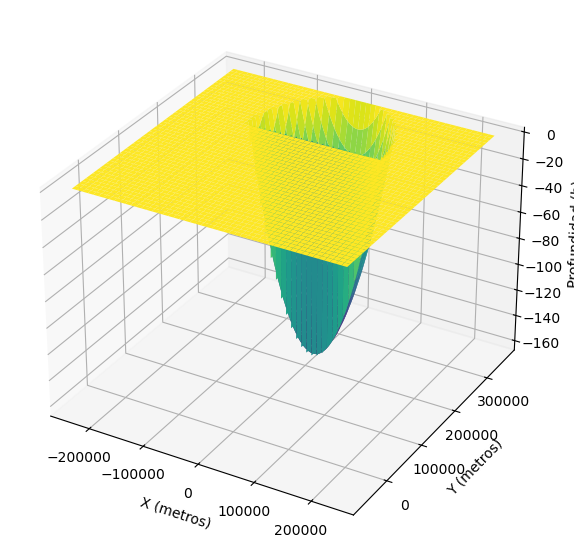

In [9]:

X_idx_start_bahia=int(L/DelX)
X_idx_end = int(L/DelX) + len(x_new)
Y_idx_start_bahia= 3110+8900 #Y_domain[3100,0]=6.851585810589313
Y_idx_end_bahia= -1

Z_domain[Y_idx_start_bahia:,X_idx_start_bahia:X_idx_end]= Z_bahia[10:,:]

# Graficar el sólido de revolución
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


# Usar plot_surface para graficar la superficie
ax.plot_surface(X_domain, Y_domain, Z_domain, cmap='viridis')
#ax.plot(X[] color='red', linewidth=2)

# Etiquetas de los ejes
ax.set_xlabel('X (metros)')
ax.set_ylabel('Y (metros)')
ax.set_zlabel('Profundidad (h)')

plt.show()

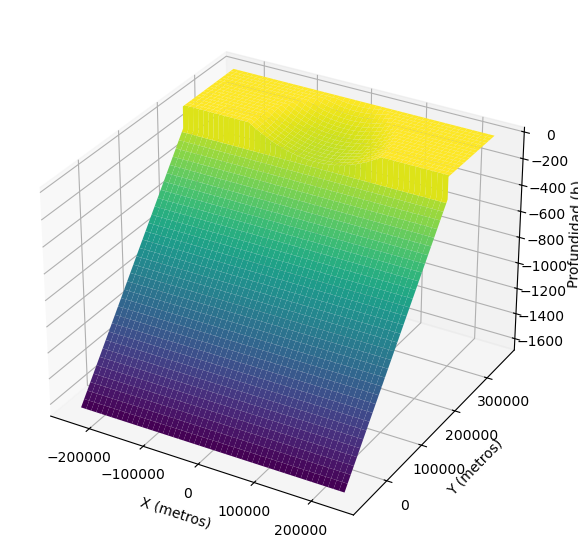

In [10]:
# --- Agregar pendiente en la región Z[:Y_idx_start_bahia-1, :] ---
# Interpolar pendiente entre Z[0,:] = Z_max y Z[Y_idx_start_bahia-1,:] = -h1
Y_slope = np.linspace(Z_max, -h1, Y_idx_start_bahia)

# Asignar la pendiente a toda la región en el eje X
Z_domain[:Y_idx_start_bahia, :] = np.tile(Y_slope[:, None], (1, nx))

# Aplicar un filtro gaussiano para suavizar las transiciones
Z_smooth = gaussian_filter(Z_domain, sigma=5)

# Graficar el sólido de revolución con la bahía y la pendiente
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Usar plot_surface para graficar la superficie
ax.plot_surface(X_domain, Y_domain, Z_smooth, cmap='viridis')

# Etiquetas de los ejes
ax.set_xlabel('X (metros)')
ax.set_ylabel('Y (metros)')
ax.set_zlabel('Profundidad (h)')

plt.show()

In [11]:
Z_domain[:Y_idx_start_bahia, :].shape

(12010, 23800)

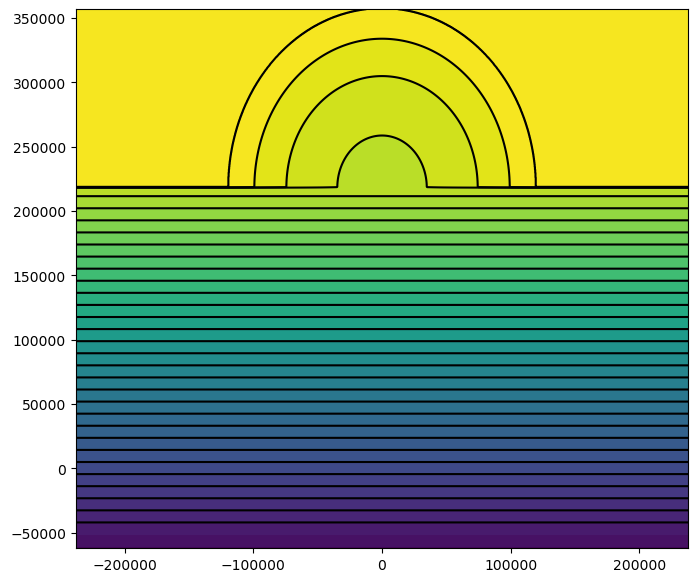

In [11]:
# Usar plot_surface para graficar la superficie
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

ax.contourf(X_domain[::10,::10], 
            Y_domain[::10,::10],
            Z_smooth[::10,::10],33, cmap='viridis')
ax.contour(X_domain[::10,::10], 
            Y_domain[::10,::10],
            -Z_smooth[::10,::10],levels=np.arange(0,1600,50),colors='k')

ax.set_aspect(1)

In [12]:
# Cortar a 1000 m de profundidad
Z_smooth_crop = np.where(Z_smooth>=-1000, Z_smooth, -1000)
Z_domain_crop = np.where(Z_domain>=-1000, Z_domain, -1000)

np.shape(Z_smooth_crop)

(17950, 23800)

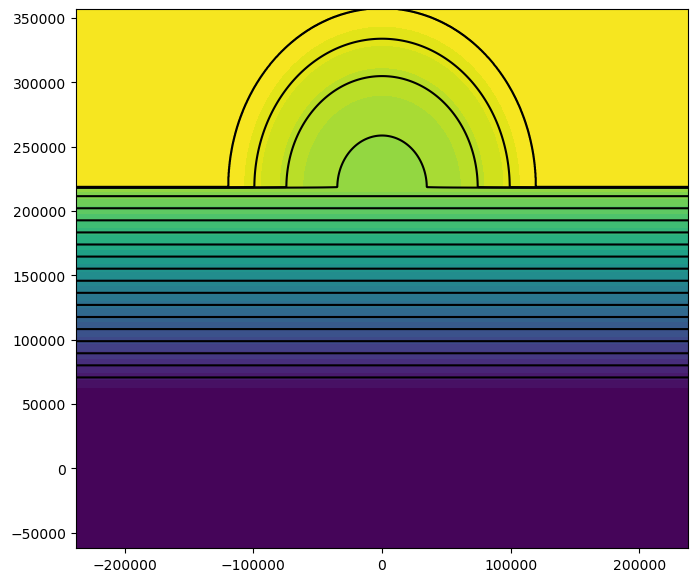

In [13]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

ax.contourf(X_domain[::10,::10], 
            Y_domain[::10,::10],
            Z_smooth_crop[::10,::10],33, cmap='viridis')
ax.contour(X_domain[::10,::10], 
            Y_domain[::10,::10],
            -Z_smooth_crop[::10,::10],levels=np.arange(0,1000,50),colors='k')

ax.set_aspect(1)

In [14]:
# Salvar versión con 10 veces menos puntos
X = X_domain[::10,::10]
Y = Y_domain[::10,::10]
Z = Z_domain_crop[::10,::10]
Z_sm = Z_smooth_crop[::10,::10]


In [20]:
#Expandimos el dominio a 4 L


array([-200.00840371, -200.00840371, -200.00840371, ..., -200.00840371,
       -200.00840371, -200.00840371])

In [17]:
Z.shape

(1795, 2380)

In [14]:
# Salvar versión con 10 veces menos puntos
X = X_domain[::10,::10]
Y = Y_domain[::10,::10]
Z = Z_domain_crop[::10,::10]
Z_sm = Z_smooth_crop[::10,::10]

import netCDF4 as nc
import numpy as np

# Crear el archivo NetCDF
filename = 'bahia01_noShelf_bat.nc'
bahia = nc.Dataset(filename, 'w', format='NETCDF4')

# Definir las dimensiones
nx = X.shape[1]
ny = Y.shape[0]

bahia.createDimension('x', nx)
bahia.createDimension('y', ny)

# Crear las variables en el archivo NetCDF
x_var = bahia.createVariable('X', np.float32, ('y', 'x'))
y_var = bahia.createVariable('Y', np.float32, ('y', 'x'))
z_var = bahia.createVariable('Z', np.float32, ('y', 'x'))
z_smooth_var = bahia.createVariable('Z_sm', np.float32, ('y', 'x'))

# Agregar atributos a las variables (opcional)
x_var.units = 'meters'
y_var.units = 'meters'
z_var.units = 'meters'
z_smooth_var.units = 'meters'

x_var.description = 'Coordenadas X del dominio'
y_var.description = 'Coordenadas Y del dominio'
z_var.description = 'Datos de profundidad del dominio Z'
z_smooth_var.description = 'Datos suavizados de profundidad del dominio Z'

# Asignar los datos a las variables
x_var[:, :] = X
y_var[:, :] = Y
z_var[:, :] = Z
z_smooth_var[:, :] = Z_sm

# Cerrar el archivo para guardar los cambios
bahia.close()

print(f"Datos guardados exitosamente en {filename}")


Datos guardados exitosamente en bahia01_noShelf_bat.nc


In [15]:
total_depth = 1000
nz = 40
dz = np.zeros(nz)
dz[0] = 2 # m
factor = 1.1045
for ii in range(1,nz):
    dz[ii] = dz[ii-1]*factor

1000.7258347279098


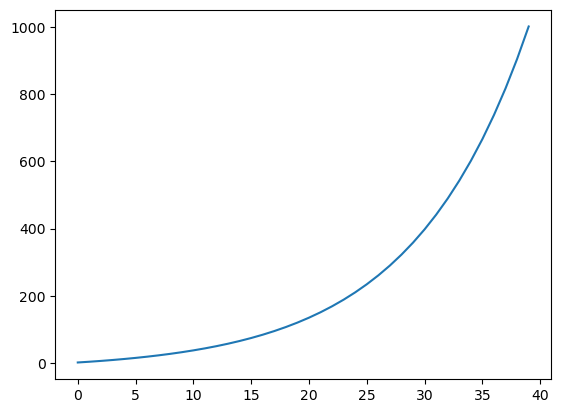

In [16]:
z_levels = np.cumsum(dz)
plt.plot(z_levels)
print(z_levels[-1])

In [17]:
# Copy this into data file
# These are the cell thicknesess - 164
zlevels_MIT = z_levels
zlevels_MIT[-1] = 1000 # Make the last level be at H

for dzii, ii in zip(np.round(dz, decimals=1), range(len(dz))):
    print(f'{dzii},', end=" ")
    if ii!=0 and ii%9 == 0:
        print('')

2.0, 2.2, 2.4, 2.7, 3.0, 3.3, 3.6, 4.0, 4.4, 4.9, 
5.4, 6.0, 6.6, 7.3, 8.0, 8.9, 9.8, 10.8, 12.0, 
13.2, 14.6, 16.1, 17.8, 19.7, 21.7, 24.0, 26.5, 29.3, 
32.3, 35.7, 39.4, 43.6, 48.1, 53.1, 58.7, 64.8, 71.6, 
79.1, 87.4, 96.5, 

Remove 0.24 m from last two levels to make it fit into 1000 m, because the sum of printed results is 1000.5

In [18]:
dz[-2]=dz[-2]-0.24
dz[-1]=dz[-1]-0.24

np.cumsum(np.round(dz, decimals=1))

array([   2. ,    4.2,    6.6,    9.3,   12.3,   15.6,   19.2,   23.2,
         27.6,   32.5,   37.9,   43.9,   50.5,   57.8,   65.8,   74.7,
         84.5,   95.3,  107.3,  120.5,  135.1,  151.2,  169. ,  188.7,
        210.4,  234.4,  260.9,  290.2,  322.5,  358.2,  397.6,  441.2,
        489.3,  542.4,  601.1,  665.9,  737.5,  816.6,  903.7, 1000. ])

In [19]:
for dzii, ii in zip(np.round(dz, decimals=1), range(len(dz))):
    print(f'{dzii},', end=" ")
    if ii!=0 and ii%8 == 0:
        print('')

2.0, 2.2, 2.4, 2.7, 3.0, 3.3, 3.6, 4.0, 4.4, 
4.9, 5.4, 6.0, 6.6, 7.3, 8.0, 8.9, 9.8, 
10.8, 12.0, 13.2, 14.6, 16.1, 17.8, 19.7, 21.7, 
24.0, 26.5, 29.3, 32.3, 35.7, 39.4, 43.6, 48.1, 
53.1, 58.7, 64.8, 71.6, 79.1, 87.1, 96.3, 

Copy this array into mitgcm data namelist, variable delR.

In [1]:
import numpy as np

# Número de niveles deseados
num_points = 100

# Profundidad total
total_depth = 1000

# Calcula los espesores iniciales
dz = np.linspace(2, total_depth / num_points, num_points)

# Ajusta el último nivel para que alcance exactamente 1000 m
dz[-1] = total_depth - np.sum(dz[:-1])

# Verifica los niveles acumulativos
zlevels_MIT = np.cumsum(dz)

# Imprime los valores para incluir en tu archivo data
for dzii, ii in zip(np.round(dz, decimals=1), range(len(dz))):
    print(f'{dzii},', end=" ")
    if ii != 0 and ii % 9 == 0:
        print('')

print("\n")
print("Niveles acumulados:", np.round(zlevels_MIT, decimals=2))


2.0, 2.1, 2.2, 2.2, 2.3, 2.4, 2.5, 2.6, 2.6, 2.7, 
2.8, 2.9, 3.0, 3.1, 3.1, 3.2, 3.3, 3.4, 3.5, 
3.5, 3.6, 3.7, 3.8, 3.9, 3.9, 4.0, 4.1, 4.2, 
4.3, 4.3, 4.4, 4.5, 4.6, 4.7, 4.7, 4.8, 4.9, 
5.0, 5.1, 5.2, 5.2, 5.3, 5.4, 5.5, 5.6, 5.6, 
5.7, 5.8, 5.9, 6.0, 6.0, 6.1, 6.2, 6.3, 6.4, 
6.4, 6.5, 6.6, 6.7, 6.8, 6.8, 6.9, 7.0, 7.1, 
7.2, 7.3, 7.3, 7.4, 7.5, 7.6, 7.7, 7.7, 7.8, 
7.9, 8.0, 8.1, 8.1, 8.2, 8.3, 8.4, 8.5, 8.5, 
8.6, 8.7, 8.8, 8.9, 8.9, 9.0, 9.1, 9.2, 9.3, 
9.4, 9.4, 9.5, 9.6, 9.7, 9.8, 9.8, 9.9, 410.0, 


Niveles acumulados: [   2.      4.08    6.24    8.48   10.81   13.21   15.7    18.26   20.91
   23.64   26.44   29.33   32.3    35.35   38.48   41.7    44.99   48.36
   51.82   55.35   58.97   62.67   66.44   70.3    74.24   78.26   82.36
   86.55   90.81   95.15   99.58  104.08  108.67  113.33  118.08  122.91
  127.82  132.81  137.88  143.03  148.26  153.58  158.97  164.44  170.
  175.64  181.35  187.15  193.03  198.99  205.03  211.15  217.35  223.64
  230.    236.44  242.97  249